# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
output_data_file='output_data/cities.csv'


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities[:10], 'Generate', len(cities))



Number of cities in the list: 617
['sangmelima', 'burang', 'ilulissat', 'grytviken', 'west island', 'klaksvik', 'laguna', 'puerto lempira', 'lander', 'port-aux-francais'] Generate 617


In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []


city="i"
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country =city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
print(len(city_data))


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sangmelima
Processing Record 2 of Set 1 | burang
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | puerto lempira
Processing Record 9 of Set 1 | lander
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | iskateley
Processing Record 12 of Set 1 | hoemul-li
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | west bay
Processing Record 20 of Set 1 | nantucket
Processing Record 21 of Set 1 | majene
Processing Record 22 of Set 1 | ust-tsilma
Processing Record 23 of Set 1

Processing Record 40 of Set 4 | saipan
Processing Record 41 of Set 4 | waverly
Processing Record 42 of Set 4 | caracal
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | acarau
Processing Record 45 of Set 4 | alice springs
Processing Record 46 of Set 4 | constantia
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | grandola
Processing Record 49 of Set 4 | bikenibeu village
Processing Record 0 of Set 5 | niquelandia
Processing Record 1 of Set 5 | karuzi
Processing Record 2 of Set 5 | sunland park
Processing Record 3 of Set 5 | yeed
Processing Record 4 of Set 5 | virginia
Processing Record 5 of Set 5 | nchelenge
Processing Record 6 of Set 5 | taltal
Processing Record 7 of Set 5 | magadan
Processing Record 8 of Set 5 | port elizabeth
Processing Record 9 of Set 5 | holualoa
Processing Record 10 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 5 | felege neway
Processing Record 12 of Set 5 | qamdo
Processing Record

Processing Record 32 of Set 8 | elmendorf air force base
City not found. Skipping...
Processing Record 33 of Set 8 | ryotsu-minato
Processing Record 34 of Set 8 | lembar
City not found. Skipping...
Processing Record 35 of Set 8 | tshabong
Processing Record 36 of Set 8 | shangzhi
Processing Record 37 of Set 8 | takoradi
Processing Record 38 of Set 8 | pangody
Processing Record 39 of Set 8 | maxixe
Processing Record 40 of Set 8 | kirakira
Processing Record 41 of Set 8 | aswan
Processing Record 42 of Set 8 | san clemente
Processing Record 43 of Set 8 | los arabos
Processing Record 44 of Set 8 | ta`u
Processing Record 45 of Set 8 | nakamura
Processing Record 46 of Set 8 | fort mcmurray
Processing Record 47 of Set 8 | macau
Processing Record 48 of Set 8 | nagqu
Processing Record 49 of Set 8 | altai
Processing Record 0 of Set 9 | ternitz
Processing Record 1 of Set 9 | kalabo
Processing Record 2 of Set 9 | klyuchi
Processing Record 3 of Set 9 | kwidzyn
Processing Record 4 of Set 9 | mugia
Pro

Processing Record 22 of Set 12 | guiria
City not found. Skipping...
Processing Record 23 of Set 12 | richmond
Processing Record 24 of Set 12 | abepura
Processing Record 25 of Set 12 | goure
Processing Record 26 of Set 12 | santo domingo de los colorados
Processing Record 27 of Set 12 | muzayri'
City not found. Skipping...
Processing Record 28 of Set 12 | sonoita
Processing Record 29 of Set 12 | sangkhla buri
Processing Record 30 of Set 12 | obo
Processing Record 31 of Set 12 | huescar
Processing Record 32 of Set 12 | sarmiento
Processing Record 33 of Set 12 | yoloten
Processing Record 34 of Set 12 | mossel bay
Processing Record 35 of Set 12 | ojinaga
Processing Record 36 of Set 12 | ovalle
Processing Record 37 of Set 12 | dan sadau
Processing Record 38 of Set 12 | crook
Processing Record 39 of Set 12 | buala
Processing Record 40 of Set 12 | amloh
Processing Record 41 of Set 12 | greymouth
Processing Record 42 of Set 12 | zaragoza
Processing Record 43 of Set 12 | santa barbara
Processin

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
city_data_df = pd.DataFrame(city_data)
city_data_df

#city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sangmelima,2.9333,11.9833,23.24,85,100,1.14,CM,1691511661
1,burang,30.2500,81.1667,12.79,81,97,2.08,CN,1691511661
2,ilulissat,69.2167,-51.1000,10.01,53,20,2.06,GL,1691511661
3,grytviken,-54.2811,-36.5092,-3.82,82,29,3.57,GS,1691511661
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691511662
...,...,...,...,...,...,...,...,...,...
583,sparti,37.0733,22.4297,29.42,42,1,2.95,GR,1691511774
584,newman,37.3138,-121.0208,27.91,66,0,0.89,US,1691511775
585,guanica,17.9716,-66.9080,32.94,69,15,5.42,PR,1691511775
586,murun-kuren,49.6342,100.1625,16.09,85,100,0.13,MN,1691511775


In [5]:

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sangmelima,2.9333,11.9833,23.24,85,100,1.14,CM,1691511661
1,burang,30.2500,81.1667,12.79,81,97,2.08,CN,1691511661
2,ilulissat,69.2167,-51.1000,10.01,53,20,2.06,GL,1691511661
3,grytviken,-54.2811,-36.5092,-3.82,82,29,3.57,GS,1691511661
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691511662


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sangmelima,2.9333,11.9833,23.24,85,100,1.14,CM,1691511661
1,burang,30.2500,81.1667,12.79,81,97,2.08,CN,1691511661
2,ilulissat,69.2167,-51.1000,10.01,53,20,2.06,GL,1691511661
3,grytviken,-54.2811,-36.5092,-3.82,82,29,3.57,GS,1691511661
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691511662


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

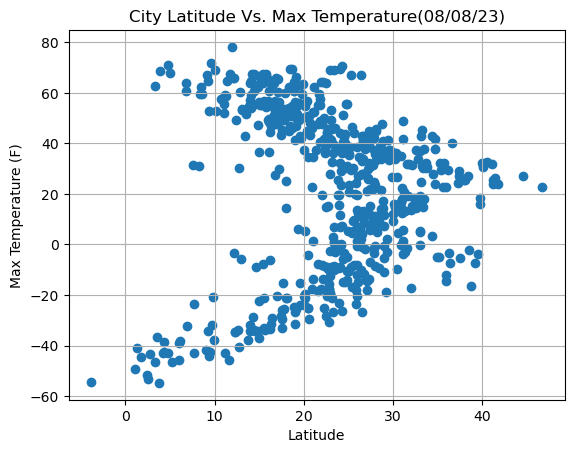

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"])


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

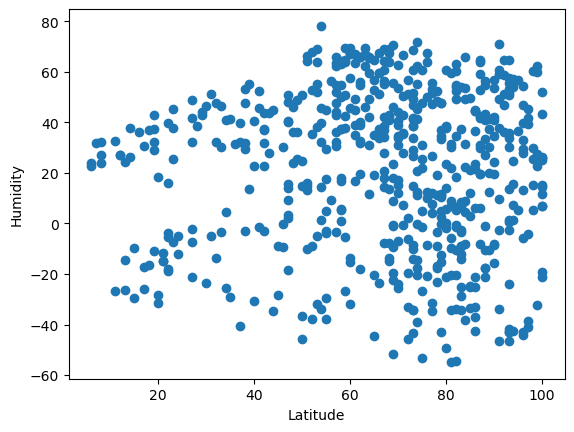

In [10]:
# Build a scatter plot for all cities vs humidity :
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"])


# Incorporate the other graph properties:
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

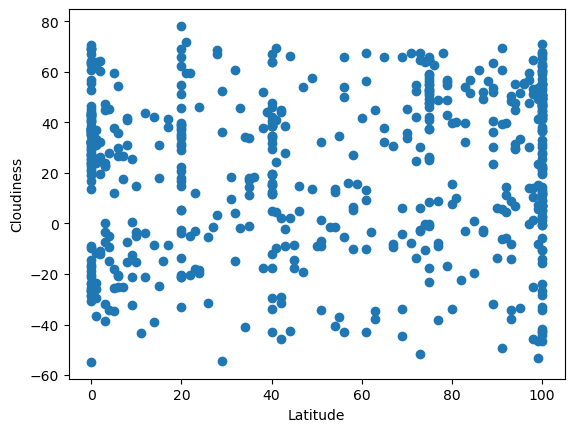

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

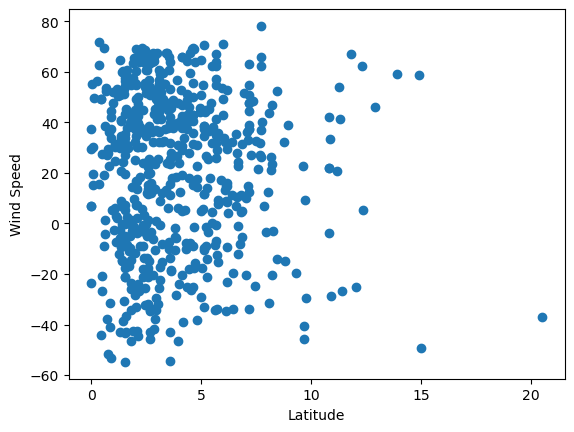

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) =linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sangmelima,2.9333,11.9833,23.24,85,100,1.14,CM,1691511661
1,burang,30.2500,81.1667,12.79,81,97,2.08,CN,1691511661
2,ilulissat,69.2167,-51.1000,10.01,53,20,2.06,GL,1691511661
5,klaksvik,62.2266,-6.5890,8.51,74,100,12.30,FO,1691511662
6,laguna,38.4210,-121.4238,27.20,67,0,4.12,US,1691511662


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,-3.82,82,29,3.57,GS,1691511661
4,west island,-12.1568,96.8225,25.99,83,40,6.69,CC,1691511662
9,port-aux-francais,-49.3500,70.2167,1.14,80,91,14.99,TF,1691511663
12,blackmans bay,-43.0167,147.3167,4.18,93,56,2.66,AU,1691511663
14,lebu,-37.6167,-73.6500,13.74,55,93,2.88,CL,1691511664


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6189996766735394


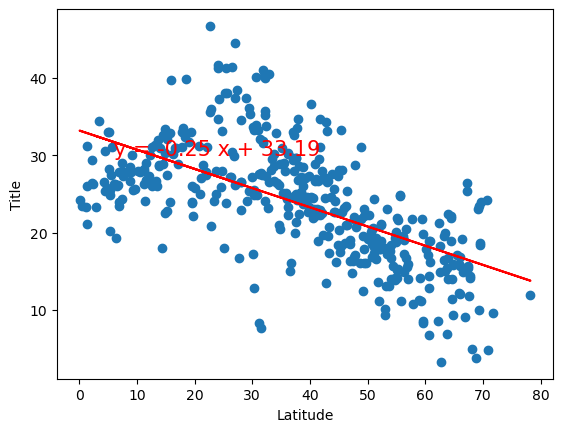

<Figure size 640x480 with 0 Axes>

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))
plt.savefig("../output_data/Fig5.png")


The r-squared is: 0.8173090470100948


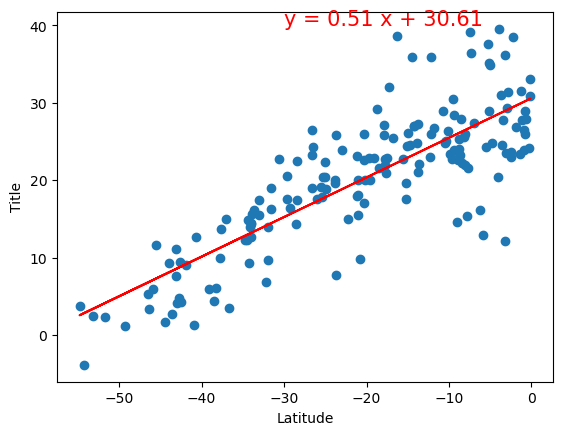

<Figure size 640x480 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))
plt.savefig("../output_data/Fig6.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.029025073533017323


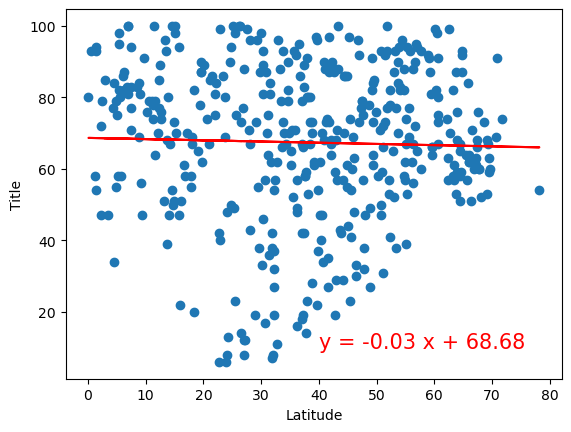

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))


The r-squared is: -0.1759314095576547


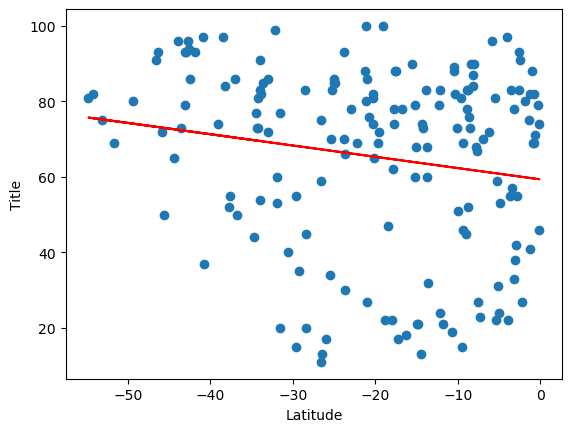

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.041380021965292085


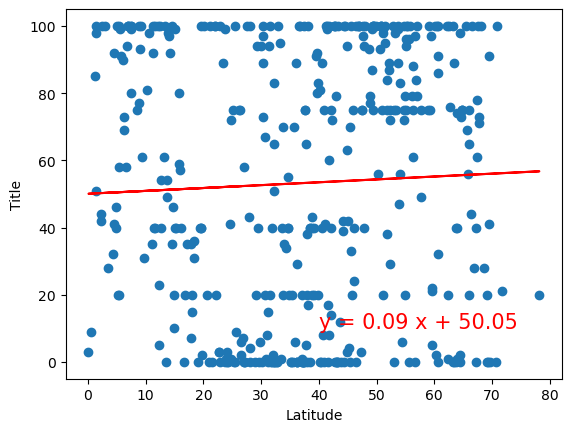

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.04301068422980669


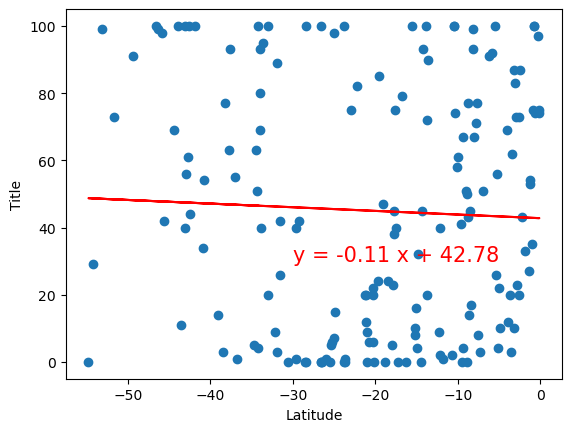

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.03907835985071033


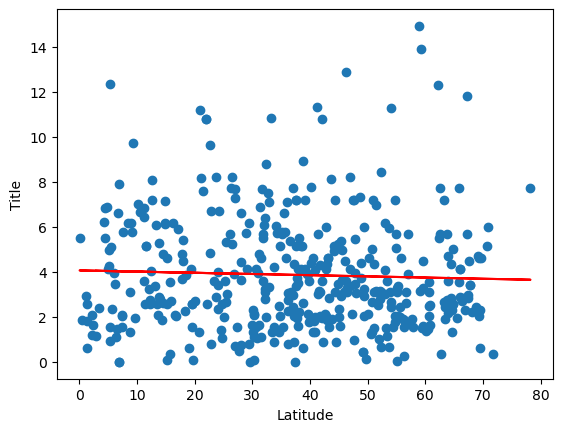

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

The r-squared is: -0.06003602269979258


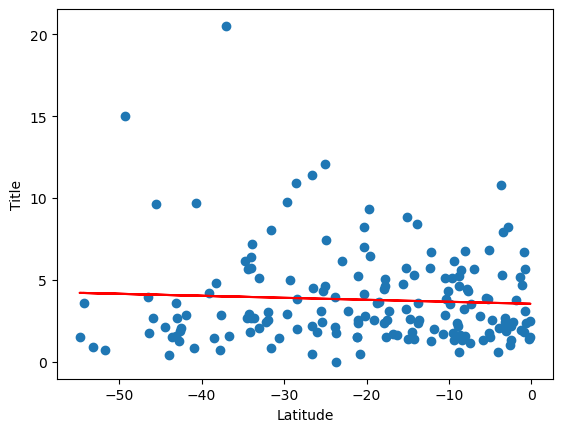

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-20,30))
                       

**Discussion about the linear relationship:** YOUR RESPONSE HERE